In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
L = 1.0      # 空间长度
c = 1.0      # 波速
T = 3.0+1.0/6      # 模拟时间
dx = 0.001
dt = 0.0005

nx = round(L/dx) # 空间离散点数
nt = round(T/dt) # 时间离散点数

r = c * dt / dx

print("Spatial cell number = ",nx)
print("Number of time steps =",nt)

# 稳定性条件检查 (CFL条件)
if r > 1:
    print("Warning: The scheme IS unstable because r > 1.")
else:
    print("CFL number is:",r)

Spatial cell number =  10000
Number of time steps = 63333
CFL number is: 0.5


In [10]:
# 创建空间网格
x = np.linspace(0, L, nx + 1)
print(x)

[0.000e+00 1.000e-04 2.000e-04 ... 9.998e-01 9.999e-01 1.000e+00]


In [11]:
# 初始条件
u_0 = np.sin(2 * np.pi * x / L)  # f(x) = sin(2πx / L)
u_prev = u_0.copy()

In [12]:
# 使用Taylor展开计算u_1
u_curr = u_0 + 0.5 * r**2 * (np.roll(u_0, -1) - 2 * u_0 + np.roll(u_0, 1))

In [13]:
# 存储解的列表
results = [u_prev.copy(), u_curr.copy()]
print(np.shape(results))

(2, 10001)


In [14]:
# 解析解函数
def analytical_solution(x, t, L, c):
    return np.sin(2 * np.pi * x / L) * np.cos(2 * np.pi * c * t / L)

In [15]:
# 迭代更新
for n in range(1, nt):
    u_next = 2 * u_curr - u_prev + r**2 / 12.0 * (-np.roll(u_curr, -2) + 16.0*np.roll(u_curr,-1) - 30.0*u_curr + 16.0*np.roll(u_curr, 1) - np.roll(u_curr, 2))
    
    # 更新变量
    u_prev = u_curr
    u_curr = u_next
    
    # 存储结果
    results.append(u_curr.copy())

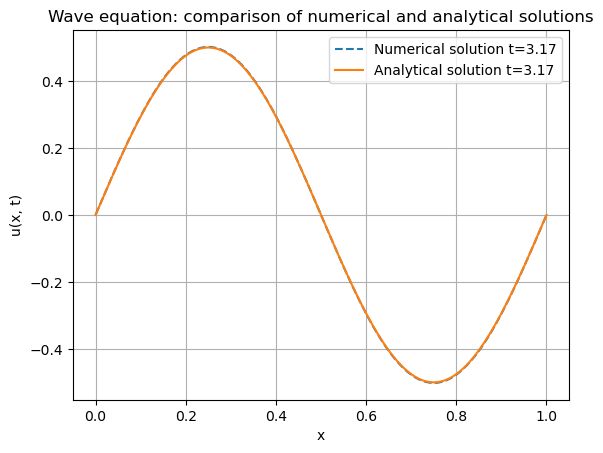

In [16]:
numerical_solution = results[-1]
analytical_solution_values = analytical_solution(x, T, L, c)
    
# 画出数值解
plt.plot(x, numerical_solution, linestyle='--', label=f"Numerical solution t={T:.2f}")
    
# 画出解析解
plt.plot(x, analytical_solution_values, linestyle='-', label=f"Analytical solution t={T:.2f}")

plt.legend()
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Wave equation: comparison of numerical and analytical solutions")
plt.grid(True)
plt.show()